In [20]:
#!pip install matplotlib==3.5.0

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)


# folder path
dir_path  = '/home/cecilia/repos/mogp_with_terms/moeir_comparison/'
save_path = dir_path

MOGP DFs

In [22]:
# LAST GEN
path_mogp_pr10 = dir_path + 'co3_precision10_evaluation_stats_last_gen.csv'
df_mogp_p10 = pd.read_csv(path_mogp_pr10)

df_mogp_p10

,Unnamed: 0,mean_prec,count_prec,std_prec,ci95_lo_prec,ci95_hi_prec
0,0,0.55984,25,0.259999,0.45792,0.661759


In [23]:
# 1st gen
path_mogp_pr10_1st = dir_path + 'co3_precision10_evaluation_stats_gen_1.csv'
df_mogp_p10_1st = pd.read_csv(path_mogp_pr10_1st)

df_mogp_p10_1st

,Unnamed: 0,mean_prec,count_prec,std_prec,ci95_lo_prec,ci95_hi_prec
0,0,0.096849,25,0.099733,0.057753,0.135944


MOEIR DFs

In [24]:
# last gen
path_moeir_pr10 = dir_path + 'moeir_precision10_evaluation_stats_last_gen.csv'
df_moeir_p10 = pd.read_csv(path_moeir_pr10)

df_moeir_p10

,Unnamed: 0,mean_prec,count_prec,std_prec,ci95_lo_prec,ci95_hi_prec
0,0,0.396307,25,0.213751,0.312517,0.480097


0.0968485714285715
[(0.0390952054294519, 0), (0.1019196171027283, 0.08379022296559847)]
atr  1st Gen  measurem  (0.0968485714285715, 0)
atr  Last Gen  measurem  (0.5598397777777778, 0.3963070793650793)


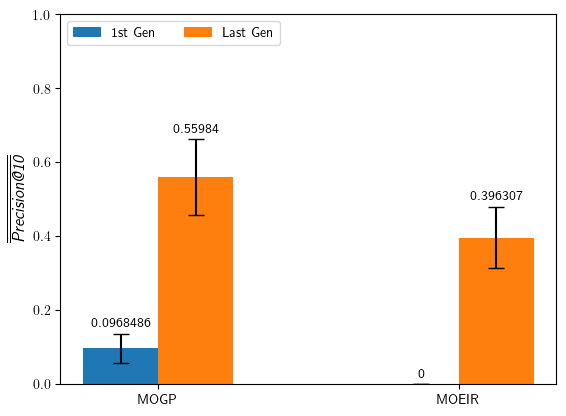

In [27]:
def IC_95(std, cant_items):
    
    return std * 1.96 / math.sqrt(cant_items)





species = ("MOGP", "MOEIR" )
print(df_mogp_p10_1st['mean_prec'][0])
penguin_means = {
    '1st Gen': (df_mogp_p10_1st['mean_prec'][0], 0),
    'Last Gen': (df_mogp_p10['mean_prec'][0], df_moeir_p10['mean_prec'][0]),
}

# ACA EL CALCULO DEBERIA SER EL DEL IC USANDO CADA DESVIO ESTANDAR!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! TERMINAR
std = [(IC_95(df_mogp_p10_1st['std_prec'][0],df_mogp_p10_1st['count_prec'][0]), 0),
       (IC_95(df_mogp_p10['std_prec'][0], df_mogp_p10['count_prec'][0]), IC_95(df_moeir_p10['std_prec'][0], df_moeir_p10['count_prec'][0] )) ]
print(std)
x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots()

for attribute, measurement in penguin_means.items():
    print("atr ", attribute," measurem ", measurement)    
    offset = width * multiplier
    #axs.bar('mogp', t['mean_prec'], yerr=t['std_prec'], capsize=6)
    rects = ax.bar(x + offset, measurement, width, yerr=std[multiplier], label=attribute, capsize=6)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'$$\overline{\overline{\textit{Precision@10}}}$$',fontsize=12)
#ax.set_title('MOGP Vs. MOEIR - Precision@10')
#ax.set_xticks(x + width, species)
#ax.set_xticks(x + width)

ax.set_xticks(x + width / 2)
ax.set_xticklabels(["MOGP", "MOEIR"])



ax.legend(loc='upper left', ncol=2)
ax.set_ylim(0, 1)

plt.show()

In [ ]:

species = ("MOGP", "MOEIR" , 'des')
x = np.arange(len(species))  # the label locations
x


array([0, 1, 2])

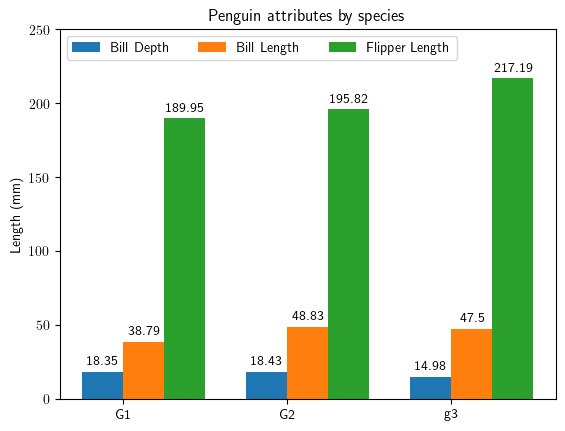

In [ ]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots()

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
#ax.set_xticks(x + width, species)

ax.set_xticks(x + width / 2)
ax.set_xticklabels(('G1', 'G2', 'g3'))



ax.legend(loc='upper left', ncol=3)
ax.set_ylim(0, 250)

plt.show()